# Библиотеки Python для DS (семинары)

Урок 2. Практическая работа с данными. Применение корреляционного анализа

Домашние задание:

Используя датасет «World Happiness Report 2019», изучите взаимосвязи между различными факторами, которые влияют на уровень счастья в разных странах.

Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

Вопросы для обсуждения:
Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?


## Выполнение домашней работы

In [2]:
# Библиотеки для скачивания датасета
from pathlib import Path
import opendatasets as od

In [10]:
# Скачиваем датасет
dataset_path = Path('PromptCloudHQ/world-happiness-report-2019')
# Проверяем существование директории с датасетом
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/PromptCloudHQ/world-happiness-report-2019')

Skipping, found downloaded files in ".\world-happiness-report-2019" (use force=True to force download)


Данный датасет с kagele мы не берём ввиду того, что в нём нет нужных нам колонок согласно условию домашнего задания, датасет был взят из материалов к домашнему заданию.

### Проводим первичный анализ данных: изучаем типы переменных, наличие пропусков, статистические характеристики.

In [13]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
# Библиотеки коффециентов
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [2]:
# Загружаем дата фрейм
df_report = pd.read_csv('world-happiness-report-2019/world_happiness_report_2019.csv')
# Выводим дата фрейм
df_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Этот фрейм данных содержит следующие столбцы:

Входные переменные (на основе физико-химических тестов):
1. Overall rank (Общий рейтинг)
2. Country or region (Страна или регион)
3. Score (Счёт/Оценка)
4. GDP per capita (ВВП на душу населения)
5. Social support (Социальная поддержка)
6. Healthy life expectancy (Продолжительность здоровой жизни)
7. Freedom to make life choices (Свобода выбора в жизни)
8. Generosity (Щедрость)
9. Perceptions of corruption (Восприятие корупции)


In [3]:
# Выводим общую информацию
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Из общей информации следует:
1. Всего 8 колонок
2. Нулевые значения отсуствуют
3. Нет пропущеных записей в колонках
4. Колонка 'Overall rank' имеет значение int64 а также колонка "Country or region" имеет object значения, остальные колонки имеют дробные значения float64

In [9]:
# Смотрим тип данных
df_report.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [4]:
df_report.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. Overall rank (Общий рейтинг): 
- Средняя фиксированая кислотность на уровне 7.90 
- Миниманая 4.60 
- Максимальная 15.90 
- Медиана равна 8.31
- Отклонение состовляет 1.74
2. Country or region (Страна или регион):
- Средние значение лимонной кислоты на уровне 0.25
- Миниманая 0.00
- Максимальная 1.00
- Медиана равна 0.26
- Отклонение состовляет 0.19
3. Score (Счёт/Оценка):
- Средние значение хлоридов на уровне 0.07
- Миниманая 0.01
- Максимальная 0.61
- Медиана равна 0.08
- Отклонение состовляет 0.04
4. GDP per capita (ВВП на душу населения):
- Средние значение общих диоксидов серы на уровне 37.00
- Миниманая 6.00
- Максимальная 289.00
- Медиана равна 45.91
- Отклонение состовляет 32.78
5. Social support (Социальная поддержка):
- Средние значение плотности на уровне 0.99
- Миниманая 0.99
- Максимальная 1.00
- Медиана равна 0.99
- Отклонение состовляет 0.00
6. Healthy life expectancy (Продолжительность здоровой жизни):
- Средние значение рН на уровне 3.31
- Миниманая 2.74
- Максимальная 4.01
- Медиана равна 3.31
- Отклонение состовляет 0.15
7. Freedom to make life choices (Свобода выбора в жизни):
- Средние значение сульфатов на уровне 0.62
- Миниманая 0.33
- Максимальная 2.00
- Медиана равна 0.65
- Отклонение состовляет 0.17
8. Generosity (Щедрость):
- Средние значение сульфатов на уровне 0.62
- Миниманая 0.33
- Максимальная 2.00
- Медиана равна 0.65
- Отклонение состовляет 0.17
9. Perceptions of corruption (Восприятие корупции):
- Средние значение сульфатов на уровне 0.62
- Миниманая 0.33
- Максимальная 2.00
- Медиана равна 0.65
- Отклонение состовляет 0.17

In [5]:
df_report.describe(include='object').T

,count,unique,top,freq
Country or region,156,156,Finland,1


На основе представленных статистических данных объектных признаков можно сделать следующие выводы:
1. Country or region (Страна и регион)
Данная информация говорит нам о том, что всего имеется 156 стран и Финлянция находится среди них на первом месте.


### Задание 1: 
##### — Анализ корреляции между ВВП на душу населения и оценкой счастья.
##### — Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.


Коэффициент корреляции Пирсона: 0.7938828678781273
P-значение: 4.315480913319774e-35


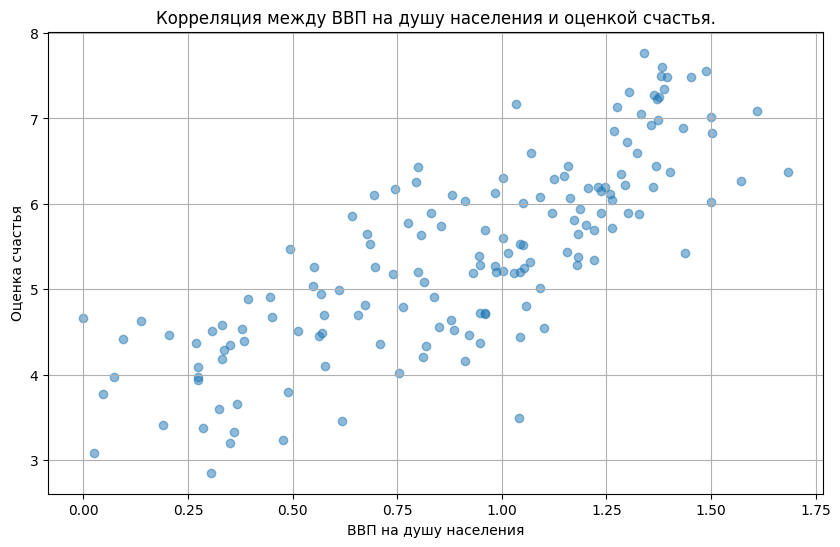

In [23]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df_report['GDP per capita'], df_report['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df_report['GDP per capita'], df_report['Score'], alpha=0.5)
plt.title('Корреляция между ВВП на душу населения и оценкой счастья.')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

1. Коэффициент коррекляции Пирсона равен 0.7938828678781273 это означает, что между ВВП населения и  оценкой счастья, есть сильная положительная связь. Из графика видно, что увеличение ВВП на душу населения приводит к повышению оценки счастья.
2. P-значение равно 4.315480913319774e-35, что меньше чем 0.05 подтверждая, что корреляция между ВВП на душу населения и счастья населения важна(значимая) и не является случайной.
3. Данные свидетельствуют о том, что ВВП на душу населения является значимым фактором, влияющим на оценку счастья. Чем выше уровень ВВП, тем выше, как правило, уровень счастья в стране. 

### Задание 2: 
##### — Исследование влияния социальной поддержки на оценку счастья.
##### — Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.


In [16]:
# Вычисляем коэффициент корреляции Спирмена
coef, p = spearmanr(df_report['Social support'], df_report['Score'])
print(f"Коэффициент корреляции Спирмена: {coef}")
print(f"P-значение: {p}")

Коэффициент корреляции Спирмена: 0.8161807357057258
P-значение: 1.613098226311642e-38


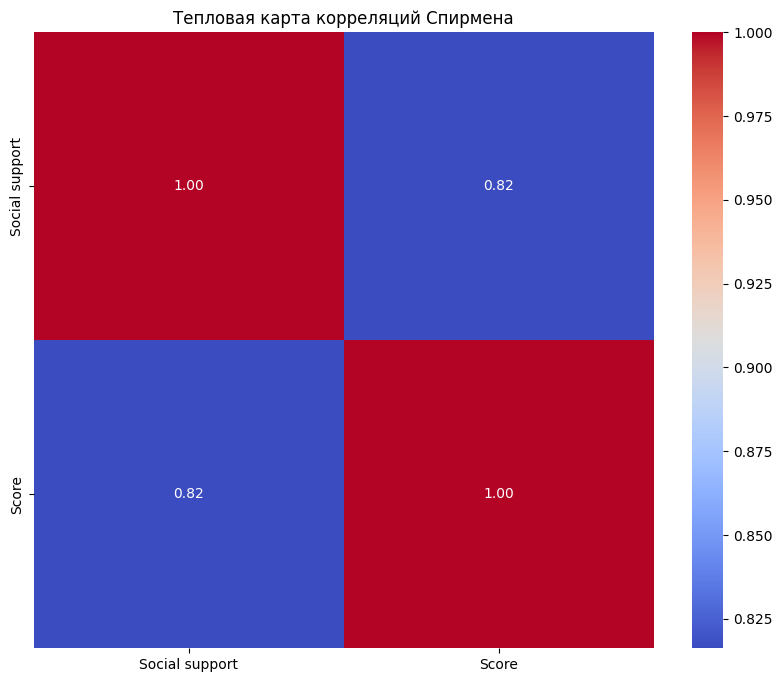

In [17]:
# Выборка количественных переменных
quantitative_vars = df_report[['Social support', 'Score']]
# Вычисляем матрицу корреляций Спирмена
correlation_matrix = quantitative_vars.corr(method='spearman')  

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Спирмена')
plt.show()

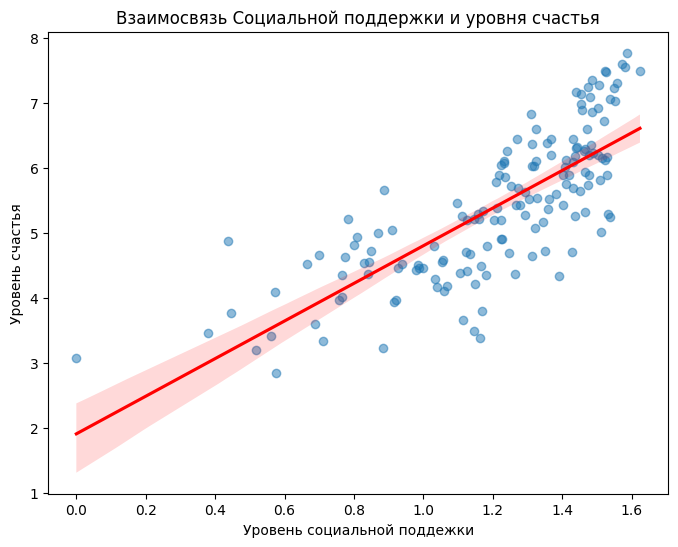

In [18]:
# График рассеивания с линией тренда для 'Social support' и 'Score'
plt.figure(figsize=(8, 6))
sns.regplot(x='Social support', y='Score', data=df_report, scatter_kws={'alpha': 0.5}, \
            line_kws={'color': 'red'})
plt.title('Взаимосвязь Социальной поддержки и уровня счастья')
plt.xlabel('Уровень социальной поддежки')
plt.ylabel('Уровень счастья')
plt.show()


1. Тепловая карта подтверждает сильную положительную корреляцию между социальной поддержкой и оценкой счастья.
2. График рассеивания показывает линейную зависимость между социальной поддержкой и оценкой счастья.
2. Коэффициент коррекляции Спирмена равен 0.8161807357057258 и близко к 1, это означает, что между социальной поддержкой и  оценкой счастья, есть сильная положительная связь.
2. P-значение равно 1.13098226311642e-38, что меньше чем 0.05 подтверждая, что корреляция между социальной поддержкой населения и счастья населения важна(значимая) и не является случайной.

### Задание 3: 
##### — Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
##### — Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.



Коэффициент корреляции Кэнделла: 0.6026128531700047
P-значение: 8.000780684230196e-29


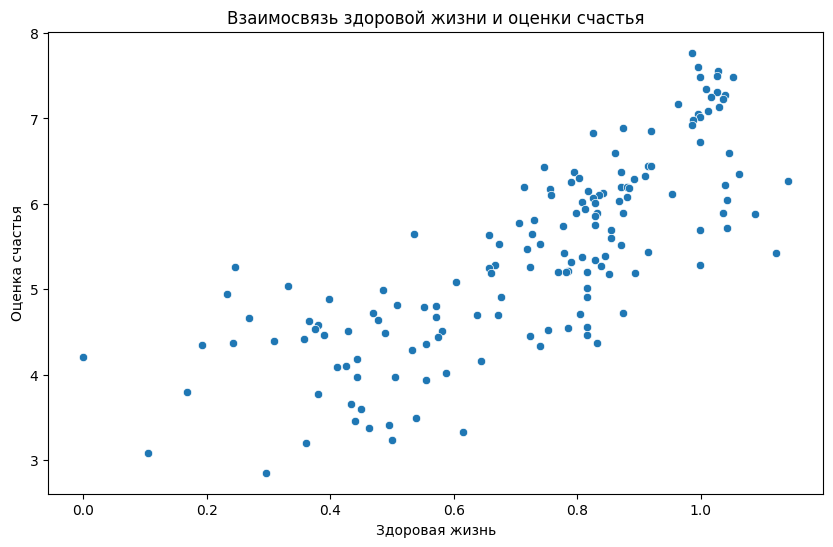

In [21]:
# Расчет коэффициента Кэнделла
tau, p_value = kendalltau(df_report["Healthy life expectancy"], df_report["Score"])
print(f"Коэффициент корреляции Кэнделла: {tau}")
print(f"P-значение: {p_value}")

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Healthy life expectancy", y="Score", data=df_report)
plt.title('Взаимосвязь здоровой жизни и оценки счастья')
plt.xlabel('Здоровая жизнь')
plt.ylabel('Оценка счастья')
plt.show()


### Задание 4:
##### — Свобода делать жизненный выбор и уровень счастья.
##### — Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.


Коэффициент корреляции Пирсона: 0.56674182571999
P-значение: 1.2379243627982083e-14


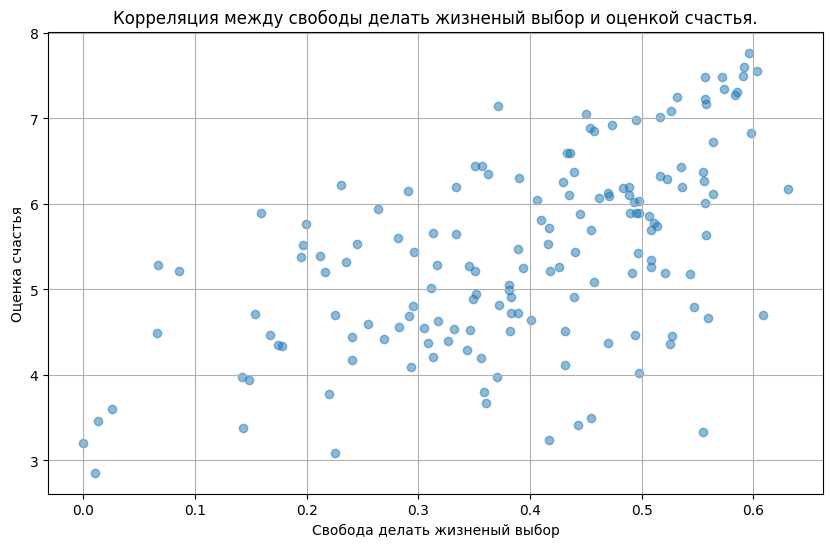

In [24]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df_report['Freedom to make life choices'], df_report['Score'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df_report['Freedom to make life choices'], df_report['Score'], alpha=0.5)
plt.title('Корреляция между свободы делать жизненый выбор и оценкой счастья.')
plt.xlabel('Свобода делать жизненый выбор')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

### Вопросы для обсуждения:
##### — Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? 
##### — В чем может заключаться причина такой взаимосвязи?